In [4]:
# Basic Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

os.getcwd()

'/content'

In [5]:
# Import the dataset
dataset = pd.read_excel('/content/Structure of the Heart Quiz (Responses).xlsx')
dataset.head()

Names  Score   Year:  \
0     A     14  year 7   
1     B     12       7   
2     C      8       7   
3     D     11       7   
4     E      7  Year 7   

  Which chamber of the heart receives deoxygenated blood from the body?   \
0                                       Right atrium                       
1                                       Right atrium                       
2                                       Right atrium                       
3                                       Right atrium                       
4                                       Right atrium                       

  The heart is primarily composed of which type of muscle tissue?  \
0                                     Cardiac muscle                
1                                     Cardiac muscle                
2                                     Cardiac muscle                
3                                      Smooth muscle                
4                                     Cardiac muscle                

  Which blood vessels carry oxygenated blood away from the heart to the rest of the body?  \
0                                           Arteries                                        
1                                           Arteries                                        
2                                           Arteries                                        
3                                           Arteries                                        
4                                        Capillaries                                        

  What is the name of the valve located between the right atrium and right ventricle?  \
0                                    Tricuspid valve                                    
1                                     Bicuspid valve                                    
2                                    Pulmonary valve                                    
3                                    Tricuspid valve                                    
4                                    Pulmonary valve                                    

  Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?  \
0                                        Capillaries                                                                  
1                                        Capillaries                                                                  
2                                           Arteries                                                                  
3                                              Veins                                                                  
4                                              Veins                                                                  

  Which chamber of the heart pumps oxygenated blood to the body?  \
0                                        Left atrium               
1                                        Left atrium               
2                                     Left ventricle               
3                                     Left ventricle               
4                                        Left atrium               

  Which valve prevents the backflow of blood from the left ventricle to the left atrium?  \
0                                     Bicuspid valve                                       
1                                    Tricuspid valve                                       
2                                     Bicuspid valve                                       
3                                    Tricuspid valve                                       
4                                       Aortic valve                                       

  What is the name of the large artery that carries oxygenated blood away from the heart?  \
0                                              Aorta                                        
1               

#Preprocessing Part
###Step 1 - Handling Missing value
###Step 2 - Handling Encoding dataset
###Step 3 - Handling Outlier
###Step 4 - To do Feature Scaling - if required
###Step 5 - To handle Imbalance dataset - this is only applicable with Classification Problem

#Step 1 - Handling Missing value
#Approaches :
###Rule 1 - check the threshold value (25% or more than 25% data are missed or not)- in case we have 25% or more data missed then we have to drop that particular variables
###Rule 2 - if we have less than 25% data missed
###Approaches - 1) check variable whether it's charactor/Object or Numbers
###In case data is numeric then we have to check boxplot and decide whether we have outlier or not
###In case we have an outlier then we will use Median otherwise Mean
###a) Outlier found - Median b) Outlier not found - Mean
###In case data is charactor / Object, we have to use MODE concept

In [6]:
# Check missing value - True or False

dataset.isnull().any()

Names                                                                                                                False
Score                                                                                                                False
Year:                                                                                                                False
Which chamber of the heart receives deoxygenated blood from the body?                                                False
The heart is primarily composed of which type of muscle tissue?                                                      False
Which blood vessels carry oxygenated blood away from the heart to the rest of the body?                              False
What is the name of the valve located between the right atrium and right ventricle?                                  False
Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?    False
Which chamber of

In [7]:
dataset.isnull().sum()

Names                                                                                                                0
Score                                                                                                                0
Year:                                                                                                                0
Which chamber of the heart receives deoxygenated blood from the body?                                                0
The heart is primarily composed of which type of muscle tissue?                                                      0
Which blood vessels carry oxygenated blood away from the heart to the rest of the body?                              0
What is the name of the valve located between the right atrium and right ventricle?                                  0
Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?    0
Which chamber of the heart pumps oxygenated bloo

In [8]:
# How much observation and variable we have ?
print(dataset.shape)
print(dataset.columns)

(16, 18)
Index(['Names', 'Score', 'Year:',
       'Which chamber of the heart receives deoxygenated blood from the body? ',
       'The heart is primarily composed of which type of muscle tissue?',
       'Which blood vessels carry oxygenated blood away from the heart to the rest of the body?',
       'What is the name of the valve located between the right atrium and right ventricle?',
       'Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?',
       'Which chamber of the heart pumps oxygenated blood to the body?',
       'Which valve prevents the backflow of blood from the left ventricle to the left atrium?',
       'What is the name of the large artery that carries oxygenated blood away from the heart?',
       'Which blood vessel carries oxygenated blood back to the heart from the lungs?',
       'The pulmonary artery carries blood to which organ?',
       'Which type of blood vessel has the thickest muscular walls to

In [9]:
# we will not drop the variables since we have less then 25% data are missed
# Following the rule 2 - check the variable type

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 18 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   Names                                                                                                              16 non-null     object
 1   Score                                                                                                              16 non-null     int64 
 2   Year:                                                                                                              16 non-null     object
 3   Which chamber of the heart receives deoxygenated blood from the body?                                              16 non-null     object
 4   The heart is primarily composed of

# Step 2 - Handling Encoding dataset

In [10]:
dataset.head()

Names  Score   Year:  \
0     A     14  year 7   
1     B     12       7   
2     C      8       7   
3     D     11       7   
4     E      7  Year 7   

  Which chamber of the heart receives deoxygenated blood from the body?   \
0                                       Right atrium                       
1                                       Right atrium                       
2                                       Right atrium                       
3                                       Right atrium                       
4                                       Right atrium                       

  The heart is primarily composed of which type of muscle tissue?  \
0                                     Cardiac muscle                
1                                     Cardiac muscle                
2                                     Cardiac muscle                
3                                      Smooth muscle                
4                                     Cardiac muscle                

  Which blood vessels carry oxygenated blood away from the heart to the rest of the body?  \
0                                           Arteries                                        
1                                           Arteries                                        
2                                           Arteries                                        
3                                           Arteries                                        
4                                        Capillaries                                        

  What is the name of the valve located between the right atrium and right ventricle?  \
0                                    Tricuspid valve                                    
1                                     Bicuspid valve                                    
2                                    Pulmonary valve                                    
3                                    Tricuspid valve                                    
4                                    Pulmonary valve                                    

  Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?  \
0                                        Capillaries                                                                  
1                                        Capillaries                                                                  
2                                           Arteries                                                                  
3                                              Veins                                                                  
4                                              Veins                                                                  

  Which chamber of the heart pumps oxygenated blood to the body?  \
0                                        Left atrium               
1                                        Left atrium               
2                                     Left ventricle               
3                                     Left ventricle               
4                                        Left atrium               

  Which valve prevents the backflow of blood from the left ventricle to the left atrium?  \
0                                     Bicuspid valve                                       
1                                    Tricuspid valve                                       
2                                     Bicuspid valve                                       
3                                    Tricuspid valve                                       
4                                       Aortic valve                                       

  What is the name of the large artery that carries oxygenated blood away from the heart?  \
0                                              Aorta                                        
1               

In [11]:
#import re
#def standardize_year(year):
#    # Extract numbers from the string
#    match = re.search(r'\d+', str(year))
#    if match:
#        return int(match.group())
#    else:
#        # Handle cases where there are no digits (e.g., 'Year' without a number)
#        return pd.NaT

# Apply the function to the "Year:" column
#dataset['Standardized Year'] = dataset['Year:'].apply(standardize_year)

# Convert to datetime format (assuming the years are referring to full years)
#dataset['Year Datetime'] = pd.to_datetime(dataset['Standardized Year'], format='%Y', errors='coerce')

# Display the dataframe with the new columns
#print(dataset[['Year:', 'Standardized Year', 'Year Datetime']])

In [12]:
dataset.head()

Names  Score   Year:  \
0     A     14  year 7   
1     B     12       7   
2     C      8       7   
3     D     11       7   
4     E      7  Year 7   

  Which chamber of the heart receives deoxygenated blood from the body?   \
0                                       Right atrium                       
1                                       Right atrium                       
2                                       Right atrium                       
3                                       Right atrium                       
4                                       Right atrium                       

  The heart is primarily composed of which type of muscle tissue?  \
0                                     Cardiac muscle                
1                                     Cardiac muscle                
2                                     Cardiac muscle                
3                                      Smooth muscle                
4                                     Cardiac muscle                

  Which blood vessels carry oxygenated blood away from the heart to the rest of the body?  \
0                                           Arteries                                        
1                                           Arteries                                        
2                                           Arteries                                        
3                                           Arteries                                        
4                                        Capillaries                                        

  What is the name of the valve located between the right atrium and right ventricle?  \
0                                    Tricuspid valve                                    
1                                     Bicuspid valve                                    
2                                    Pulmonary valve                                    
3                                    Tricuspid valve                                    
4                                    Pulmonary valve                                    

  Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?  \
0                                        Capillaries                                                                  
1                                        Capillaries                                                                  
2                                           Arteries                                                                  
3                                              Veins                                                                  
4                                              Veins                                                                  

  Which chamber of the heart pumps oxygenated blood to the body?  \
0                                        Left atrium               
1                                        Left atrium               
2                                     Left ventricle               
3                                     Left ventricle               
4                                        Left atrium               

  Which valve prevents the backflow of blood from the left ventricle to the left atrium?  \
0                                     Bicuspid valve                                       
1                                    Tricuspid valve                                       
2                                     Bicuspid valve                                       
3                                    Tricuspid valve                                       
4                                       Aortic valve                                       

  What is the name of the large artery that carries oxygenated blood away from the heart?  \
0                                              Aorta                                        
1               

In [13]:
dataset = dataset.drop(['Names',"Year:"], axis=1)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   Score                                                                                                              16 non-null     int64 
 1   Which chamber of the heart receives deoxygenated blood from the body?                                              16 non-null     object
 2   The heart is primarily composed of which type of muscle tissue?                                                    16 non-null     object
 3   Which blood vessels carry oxygenated blood away from the heart to the rest of the body?                            16 non-null     object
 4   What is the name of the valve loca

In [15]:
print(dataset.columns)


Index(['Score',
       'Which chamber of the heart receives deoxygenated blood from the body? ',
       'The heart is primarily composed of which type of muscle tissue?',
       'Which blood vessels carry oxygenated blood away from the heart to the rest of the body?',
       'What is the name of the valve located between the right atrium and right ventricle?',
       'Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?',
       'Which chamber of the heart pumps oxygenated blood to the body?',
       'Which valve prevents the backflow of blood from the left ventricle to the left atrium?',
       'What is the name of the large artery that carries oxygenated blood away from the heart?',
       'Which blood vessel carries oxygenated blood back to the heart from the lungs?',
       'The pulmonary artery carries blood to which organ?',
       'Which type of blood vessel has the thickest muscular walls to withstand high pressure?',

In [16]:
# Label Encoder - Char to Num
# If the column name is correct and exists, proceed with the encoding
dataset['Which chamber of the heart receives deoxygenated blood from the body? '] = dataset['Which chamber of the heart receives deoxygenated blood from the body? '].astype('category')
dataset['Which chamber of the heart receives deoxygenated blood from the body? '] = dataset['Which chamber of the heart receives deoxygenated blood from the body? '].cat.codes

dataset['The heart is primarily composed of which type of muscle tissue?'] = dataset['The heart is primarily composed of which type of muscle tissue?'].astype('category')
dataset['The heart is primarily composed of which type of muscle tissue?'] = dataset['The heart is primarily composed of which type of muscle tissue?'].cat.codes

dataset['Which blood vessels carry oxygenated blood away from the heart to the rest of the body?'] = dataset['Which blood vessels carry oxygenated blood away from the heart to the rest of the body?'].astype('category')
dataset['Which blood vessels carry oxygenated blood away from the heart to the rest of the body?'] = dataset['Which blood vessels carry oxygenated blood away from the heart to the rest of the body?'].cat.codes

dataset['What is the name of the valve located between the right atrium and right ventricle?'] = dataset['What is the name of the valve located between the right atrium and right ventricle?'].astype('category')
dataset['What is the name of the valve located between the right atrium and right ventricle?'] = dataset['What is the name of the valve located between the right atrium and right ventricle?'].cat.codes

dataset['Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?'] = dataset['Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?'].astype('category')
dataset['Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?'] = dataset['Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?'].cat.codes

dataset['Which chamber of the heart pumps oxygenated blood to the body?'] = dataset['Which chamber of the heart pumps oxygenated blood to the body?'].astype('category')
dataset['Which chamber of the heart pumps oxygenated blood to the body?'] = dataset['Which chamber of the heart pumps oxygenated blood to the body?'].cat.codes

dataset['Which valve prevents the backflow of blood from the left ventricle to the left atrium?'] = dataset['Which valve prevents the backflow of blood from the left ventricle to the left atrium?'].astype('category')
dataset['Which valve prevents the backflow of blood from the left ventricle to the left atrium?'] = dataset['Which valve prevents the backflow of blood from the left ventricle to the left atrium?'].cat.codes

dataset['What is the name of the large artery that carries oxygenated blood away from the heart?'] = dataset['What is the name of the large artery that carries oxygenated blood away from the heart?'].astype('category')
dataset['What is the name of the large artery that carries oxygenated blood away from the heart?'] = dataset['What is the name of the large artery that carries oxygenated blood away from the heart?'].cat.codes

dataset['Which blood vessel carries oxygenated blood back to the heart from the lungs?'] = dataset['Which blood vessel carries oxygenated blood back to the heart from the lungs?'].astype('category')
dataset['Which blood vessel carries oxygenated blood back to the heart from the lungs?'] = dataset['Which blood vessel carries oxygenated blood back to the heart from the lungs?'].cat.codes

dataset['The pulmonary artery carries blood to which organ?'] = dataset['The pulmonary artery carries blood to which organ?'].astype('category')
dataset['The pulmonary artery carries blood to which organ?'] = dataset['The pulmonary artery carries blood to which organ?'].cat.codes

dataset['Which type of blood vessel has the thickest muscular walls to withstand high pressure?'] = dataset['Which type of blood vessel has the thickest muscular walls to withstand high pressure?'].astype('category')
dataset['Which type of blood vessel has the thickest muscular walls to withstand high pressure?'] = dataset['Which type of blood vessel has the thickest muscular walls to withstand high pressure?'].cat.codes

dataset['Which type of blood vessel has thin walls and valves to prevent the backflow of blood?'] = dataset['Which type of blood vessel has thin walls and valves to prevent the backflow of blood?'].astype('category')
dataset['Which type of blood vessel has thin walls and valves to prevent the backflow of blood?'] = dataset['Which type of blood vessel has thin walls and valves to prevent the backflow of blood?'].cat.codes

dataset['Which of the following is NOT an adaptation of alveoli for efficient gas exchange?'] = dataset['Which of the following is NOT an adaptation of alveoli for efficient gas exchange?'].astype('category')
dataset['Which of the following is NOT an adaptation of alveoli for efficient gas exchange?'] = dataset['Which of the following is NOT an adaptation of alveoli for efficient gas exchange?'].cat.codes

dataset['What is the primary function of alveoli in the respiratory system?'] = dataset['What is the primary function of alveoli in the respiratory system?'].astype('category')
dataset['What is the primary function of alveoli in the respiratory system?'] = dataset['What is the primary function of alveoli in the respiratory system?'].cat.codes

dataset['Which chamber of the heart has the thickest muscular walls to pump blood?'] = dataset['Which chamber of the heart has the thickest muscular walls to pump blood?'].astype('category')
dataset['Which chamber of the heart has the thickest muscular walls to pump blood?'] = dataset['Which chamber of the heart has the thickest muscular walls to pump blood?'].cat.codes



In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                                                                                                             Non-Null Count  Dtype
---  ------                                                                                                             --------------  -----
 0   Score                                                                                                              16 non-null     int64
 1   Which chamber of the heart receives deoxygenated blood from the body?                                              16 non-null     int8 
 2   The heart is primarily composed of which type of muscle tissue?                                                    16 non-null     int8 
 3   Which blood vessels carry oxygenated blood away from the heart to the rest of the body?                            16 non-null     int8 
 4   What is the name of the valve located be

In [18]:
dataset.head()

Score  \
0     14   
1     12   
2      8   
3     11   
4      7   

   Which chamber of the heart receives deoxygenated blood from the body?   \
0                                                  1                        
1                                                  1                        
2                                                  1                        
3                                                  1                        
4                                                  1                        

   The heart is primarily composed of which type of muscle tissue?  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  2                 
4                                                  0                 

   Which blood vessels carry oxygenated blood away from the heart to the rest of the body?  \
0                                                  0                                         
1                                                  0                                         
2                                                  0                                         
3                                                  0                                         
4                                                  1                                         

   What is the name of the valve located between the right atrium and right ventricle?  \
0                                                  3                                     
1                                                  1                                     
2                                                  2                                     
3                                                  3                                     
4                                                  2                                     

   Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?  \
0                                                  1                                                                   
1                                                  1                                                                   
2                                                  0                                                                   
3                                                  2                                                                   
4                                                  2                                                                   

   Which chamber of the heart pumps oxygenated blood to the body?  \
0                                                  0                
1                                                  0                
2                                                  1                
3                                                  1                
4                                                  0                

   Which valve prevents the backflow of blood from the left ventricle to the left atrium?  \
0                                                  1                                        
1                                                  3                                        
2                                                  1                                        
3                                                  3                                        
4                                                  0                                        

   What is the name of the large artery that carries oxygenated blood away from the heart?  \
0                                                  0                                         
1                                                  0     

In [19]:
# One Hot Encoding

dataset = pd.get_dummies(dataset, columns = ['Which chamber of the heart receives deoxygenated blood from the body? ','The heart is primarily composed of which type of muscle tissue?','Which blood vessels carry oxygenated blood away from the heart to the rest of the body?',
                                               "What is the name of the valve located between the right atrium and right ventricle?","Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?",
                                               "Which chamber of the heart pumps oxygenated blood to the body?","Which valve prevents the backflow of blood from the left ventricle to the left atrium?","What is the name of the large artery that carries oxygenated blood away from the heart?",
                                               "Which blood vessel carries oxygenated blood back to the heart from the lungs?","The pulmonary artery carries blood to which organ?","Which type of blood vessel has the thickest muscular walls to withstand high pressure?",
                                               "Which type of blood vessel has thin walls and valves to prevent the backflow of blood?","Which of the following is NOT an adaptation of alveoli for efficient gas exchange?","What is the primary function of alveoli in the respiratory system?",
                                               "Which chamber of the heart has the thickest muscular walls to pump blood?"])

In [20]:
dataset.head()

Score  \
0     14   
1     12   
2      8   
3     11   
4      7   

   Which chamber of the heart receives deoxygenated blood from the body? _0  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   Which chamber of the heart receives deoxygenated blood from the body? _1  \
0                                                  1                          
1                                                  1                          
2                                                  1                          
3                                                  1                          
4                                                  1                          

   Which chamber of the heart receives deoxygenated blood from the body? _2  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   The heart is primarily composed of which type of muscle tissue?_0  \
0                                                  1                   
1                                                  1                   
2                                                  1                   
3                                                  0                   
4                                                  1                   

   The heart is primarily composed of which type of muscle tissue?_1  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   The heart is primarily composed of which type of muscle tissue?_2  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  1                   
4                                                  0                   

   Which blood vessels carry oxygenated blood away from the heart to the rest of the body?_0  \
0                                                  1                                           
1                                                  1                                           
2                                                  1                                           
3                                                  1                                           
4                                                  0                                           

   Which blood vessels carry oxygenated blood away from the heart to the rest of the body?_1  \
0                                                  0                                           
1                                                  0                                           
2                                                  0                                           
3                                                  0                                           
4                                                  1                                           

   Which blood vessels carry oxygenated blood away f

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 52 columns):
 #   Column                                                                                                               Non-Null Count  Dtype
---  ------                                                                                                               --------------  -----
 0   Score                                                                                                                16 non-null     int64
 1   Which chamber of the heart receives deoxygenated blood from the body? _0                                             16 non-null     uint8
 2   Which chamber of the heart receives deoxygenated blood from the body? _1                                             16 non-null     uint8
 3   Which chamber of the heart receives deoxygenated blood from the body? _2                                             16 non-null     uint8
 4   The heart is primarily compo

In [22]:
# Dummy variables
dataset = dataset.drop(['Which chamber of the heart receives deoxygenated blood from the body? _0','The heart is primarily composed of which type of muscle tissue?_0','Which blood vessels carry oxygenated blood away from the heart to the rest of the body?_0',
                        "What is the name of the valve located between the right atrium and right ventricle?_0","Which blood vessels are the smallest and allow for the exchange of substances between the blood and body tissues?_0",
                        "Which chamber of the heart pumps oxygenated blood to the body?_0","Which valve prevents the backflow of blood from the left ventricle to the left atrium?_0",
                        "What is the name of the large artery that carries oxygenated blood away from the heart?_0", "Which blood vessel carries oxygenated blood back to the heart from the lungs?_0","The pulmonary artery carries blood to which organ?_0",
                        "Which type of blood vessel has the thickest muscular walls to withstand high pressure?_0", "Which type of blood vessel has thin walls and valves to prevent the backflow of blood?_0",
                        "Which of the following is NOT an adaptation of alveoli for efficient gas exchange?_0","What is the primary function of alveoli in the respiratory system?_0",
                        "Which chamber of the heart has the thickest muscular walls to pump blood?_0"], axis=1)


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 37 columns):
 #   Column                                                                                                               Non-Null Count  Dtype
---  ------                                                                                                               --------------  -----
 0   Score                                                                                                                16 non-null     int64
 1   Which chamber of the heart receives deoxygenated blood from the body? _1                                             16 non-null     uint8
 2   Which chamber of the heart receives deoxygenated blood from the body? _2                                             16 non-null     uint8
 3   The heart is primarily composed of which type of muscle tissue?_1                                                    16 non-null     uint8
 4   The heart is primarily compo

##Step 3 - Handling Outlier

<Axes: ylabel='Score'>

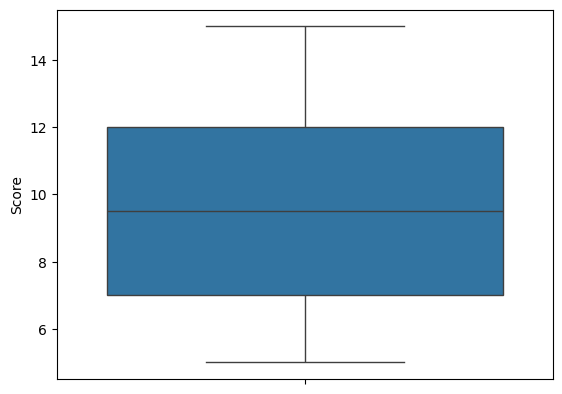

In [24]:
sns.boxplot(y='Score', data = dataset)


##Step 4 - To do Feature Scaling - if required
###StandardScaler

In [25]:
# slice the data basis independent and dependent variable
# x is inependent variable and y is dependent variable
y = dataset["Score"]
x = dataset[[col for col in dataset.columns if col != 'Score']] # change y to be a DataFrame
print(x.head())

   Which chamber of the heart receives deoxygenated blood from the body? _1  \
0                                                  1                          
1                                                  1                          
2                                                  1                          
3                                                  1                          
4                                                  1                          

   Which chamber of the heart receives deoxygenated blood from the body? _2  \
0                                                  0                          
1                                                  0                          
2                                                  0                          
3                                                  0                          
4                                                  0                          

   The heart is primarily composed of which type o

In [26]:
(y.head())

0    14
1    12
2     8
3    11
4     7
Name: Score, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
x_stand = stand_scaler.fit_transform(x)
pd.DataFrame(x_stand)

0         1         2         3         4         5         6   \
0   0.480384 -0.258199 -0.258199 -0.377964 -0.258199 -0.377964 -0.258199   
1   0.480384 -0.258199 -0.258199 -0.377964 -0.258199 -0.377964 -0.258199   
2   0.480384 -0.258199 -0.258199 -0.377964 -0.258199 -0.377964 -0.258199   
3   0.480384 -0.258199 -0.258199  2.645751 -0.258199 -0.377964 -0.258199   
4   0.480384 -0.258199 -0.258199 -0.377964  3.872983 -0.377964 -0.258199   
5   0.480384 -0.258199  3.872983 -0.377964 -0.258199 -0.377964 -0.258199   
6   0.480384 -0.258199 -0.258199 -0.377964 -0.258199 -0.377964 -0.258199   
7   0.480384 -0.258199 -0.258199 -0.377964 -0.258199 -0.377964 -0.258199   
8  -2.081666 -0.258199 -0.258199 -0.377964 -0.258199  2.645751 -0.258199   
9  -2.081666  3.872983 -0.258199  2.645751 -0.258199 -0.377964 -0.258199   
10 -2.081666 -0.258199 -0.258199 -0.377964 -0.258199 -0.377964  3.872983   
11  0.480384 -0.258199 -0.258199 -0.377964 -0.258199  2.645751 -0.258199   
12  0.480384 -0.258199 -0.258199 -0.377964 -0.258199 -0.377964 -0.258199   
13  0.480384 -0.258199 -0.258199 -0.377964 -0.258199 -0.377964 -0.258199   
14  0.480384 -0.258199 -0.258199 -0.377964 -0.258199 -0.377964 -0.258199   
15  0.480384 -0.258199 -0.258199 -0.377964 -0.258199 -0.377964 -0.258199   

          7         8         9   ...        26       27        28        29  \
0  -0.480384 -0.774597  1.290994  ... -0.258199  0.67420 -0.258199 -0.377964   
1   2.081666 -0.774597 -0.774597  ... -0.258199  0.67420 -0.258199 -0.377964   
2  -0.480384  1.290994 -0.774597  ...  3.872983 -1.48324 -0.258199 -0.377964   
3  -0.480384 -0.774597  1.290994  ... -0.258199  0.67420 -0.258199 -0.377964   
4  -0.480384  1.290994 -0.774597  ... -0.258199  0.67420 -0.258199 -0.377964   
5  -0.480384 -0.774597  1.290994  ... -0.258199  0.67420 -0.258199 -0.377964   
6  -0.480384 -0.774597  1.290994  ... -0.258199 -1.48324  3.872983 -0.377964   
7  -0.480384 -0.774597  1.290994  ... -0.258199  0.67420 -0.258199 -0.377964   
8  -0.480384  1.290994 -0.774597  ... -0.258199 -1.48324 -0.258199 -0.377964   
9  -0.480384 -0.774597 -0.774597  ... -0.258199 -1.48324 -0.258199 -0.377964   
10 -0.480384  1.290994 -0.774597  ... -0.258199  0.67420 -0.258199  2.645751   
11  2.081666 -0.774597 -0.774597  ... -0.258199 -1.48324 -0.258199  2.645751   
12 -0.480384  1.290994 -0.774597  ... -0.258199  0.67420 -0.258199 -0.377964   
13  2.081666 -0.774597 -0.774597  ... -0.258199  0.67420 -0.258199 -0.377964   
14 -0.480384 -0.774597  1.290994  ... -0.258199  0.67420 -0.258199 -0.377964   
15 -0.480384  1.290994 -0.774597  ... -0.258199  0.67420 -0.258199 -0.377964   

          30        31        32        33       34        35  
0   0.881917 -0.577350  0.577350 -0.480384  0.67420 -0.577350  
1   0.881917 -0.577350  0.577350 -0.480384  0.67420 -0.577350  
2   0.881917 -0.577350  0.577350 -0.480384 -1.48324 -0.577350  
3   0.881917 -0.577350 -1.732051  2.081666  0.67420 -0.577350  
4  -1.133893  1.732051  0.577350 -0.480384  0.67420 -0.577350  
5   0.881917 -0.577350 -1.732051 -0.480384 -1.48324  1.732051  
6  -1.133893  1.732051  0.577350 -0.480384  0.67420 -0.577350  
7   0.881917 -0.577350  0.577350 -0.480384  0.67420 -0.577350  
8   0.881917 -0.577350  0.577350 -0.480384 -1.48324  1.732051  
9   0.881917 -0.577350 -1.732051  2.081666  0.67420 -0.577350  
10 -1.133893 -0.577350  0.577350 -0.480384  0.67420 -0.577350  
11 -1.133893 -0.577350  0.577350 -0.480384 -1.48324  1.732051  
12 -1.133893  1.732051  0.577350 -0.480384  0.67420 -0.577350  
13 -1.133893  1.732051  0.577350 -0.480384  0.67420 -0.577350  
14  0.881917 -0.577350  0.577350 -0.480384  0.67420 -0.577350  
15 -1.133893 -0.577350 -1.732051  2.081666 -1.48324  1.732051  

[16 rows x 36 columns]

#EDA

In [29]:
!pip install dtale

In [37]:
!pip install dataprep

ERROR:bokeh.core.validation.check:E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'Which blood v...?_1', 'Which blood v...?_2', 'Which blood v...?_3', 'What is the n...?_1', 'What is the n...?_2', 'What is the n...?_3', 'Which chamber...?_1', 'Which chamber...?_2', 'Which type of...?_1', 'Which type of...?_2'


DataPrep Report
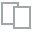
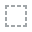
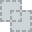
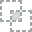
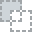
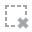
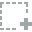
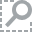
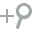
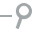
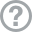
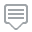
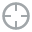
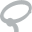
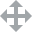
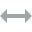
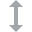
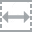
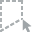
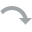
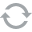
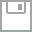
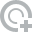
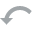
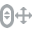
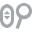
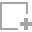
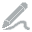
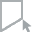
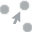
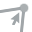
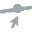

In [39]:
import dataprep.eda # imports the dataprep.eda module

dataprep.eda.create_report(x) # calls the create_report() method from the dataprep.eda module

In [72]:
!pip install --upgrade lux-api

In [77]:
!shell
!pip install lux-api
!jupyter nbextension install --py luxwidget
!jupyter nbextension enable --py luxwidget

/bin/bash: line 1: shell: command not found
Installing /usr/local/lib/python3.10/dist-packages/luxwidget/nbextension/static -> luxwidget
Up to date: /usr/local/share/jupyter/nbextensions/luxwidget/index.js
Up to date: /usr/local/share/jupyter/nbextensions/luxwidget/index.js.map
Up to date: /usr/local/share/jupyter/nbextensions/luxwidget/extension.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable luxwidget --py
    
Enabling notebook extension luxwidget/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [78]:
pd.DataFrame(x)
x

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

from matplotlib import pyplot as plt
_df_40[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_49[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_50[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_51[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_63[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

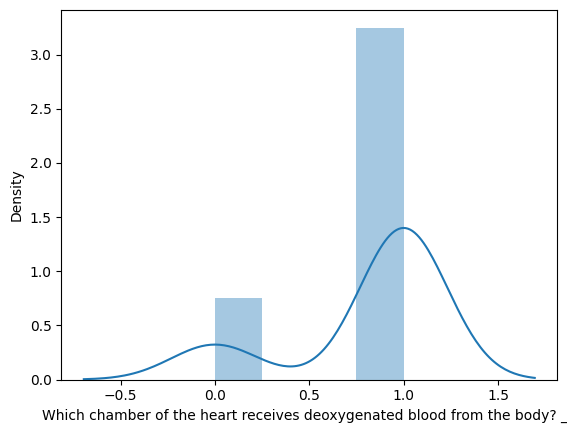

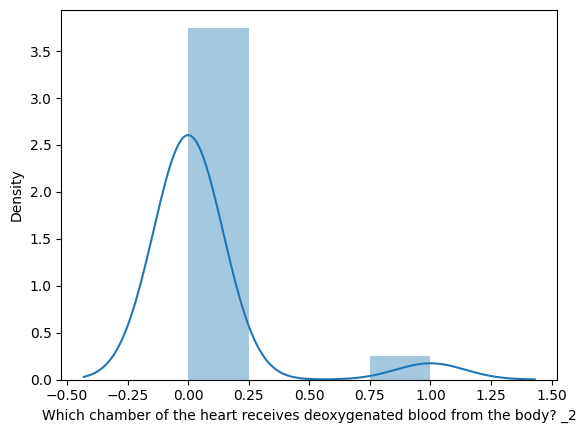

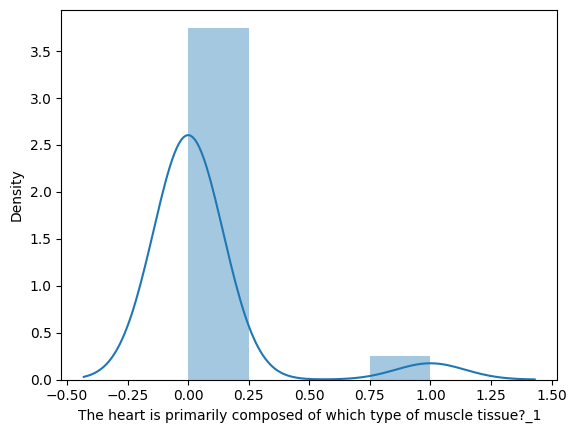

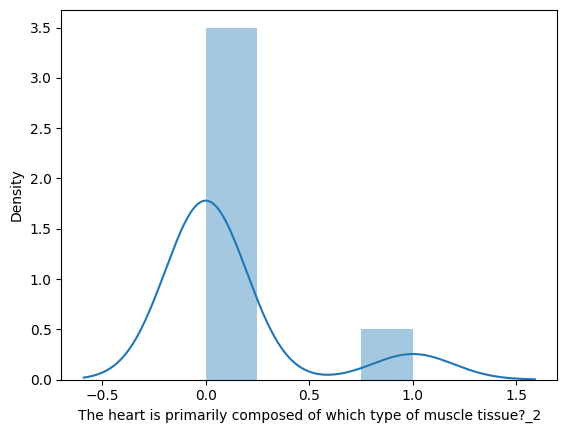

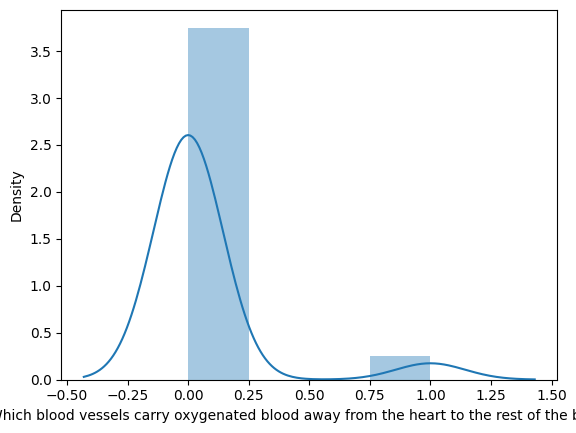

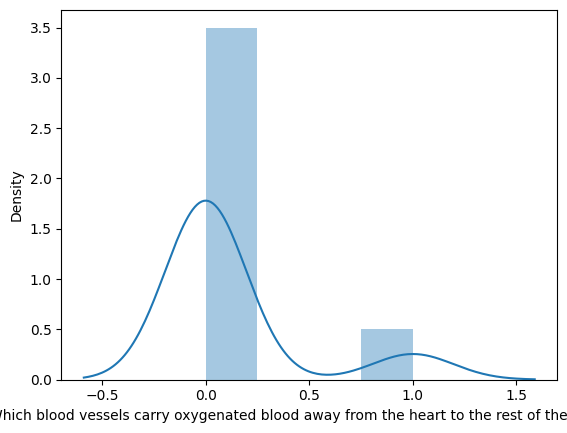

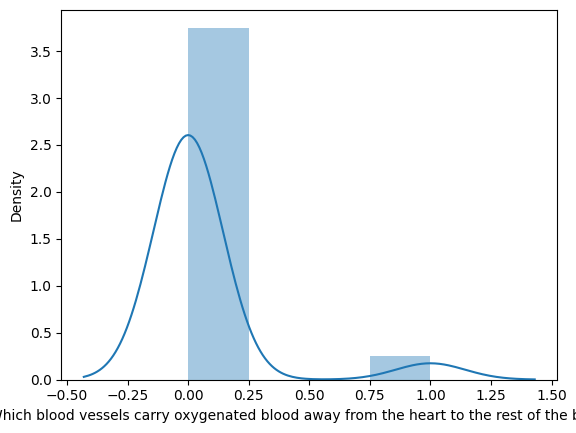

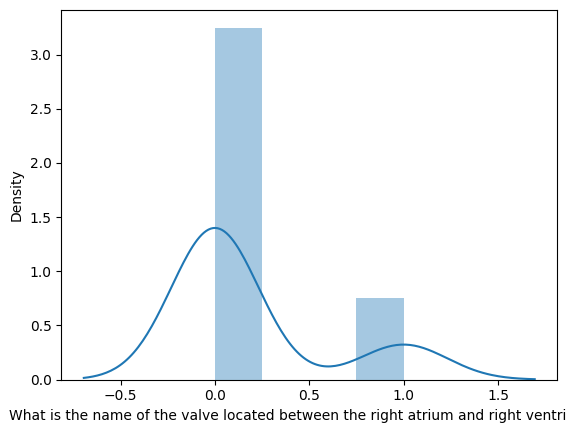

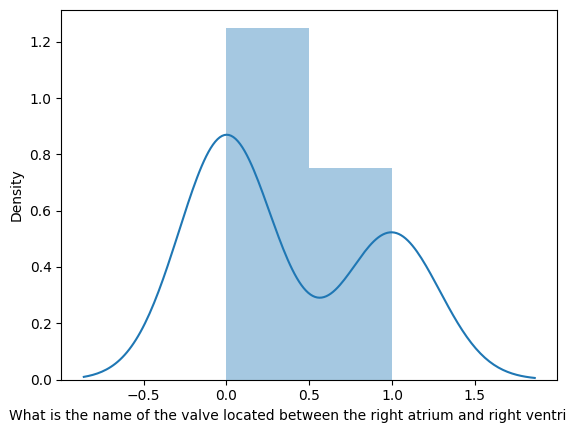

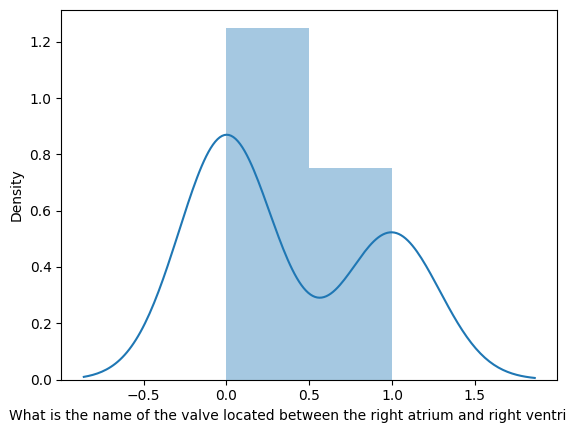

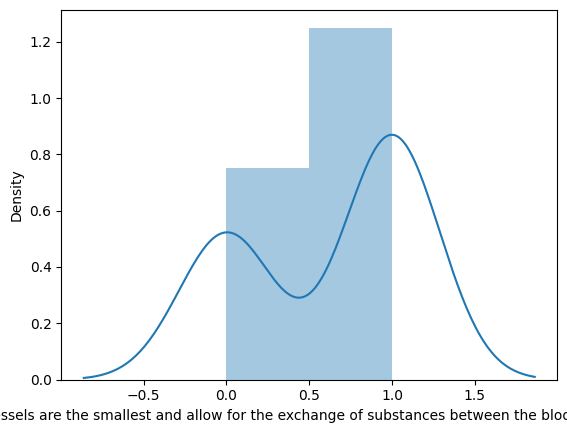

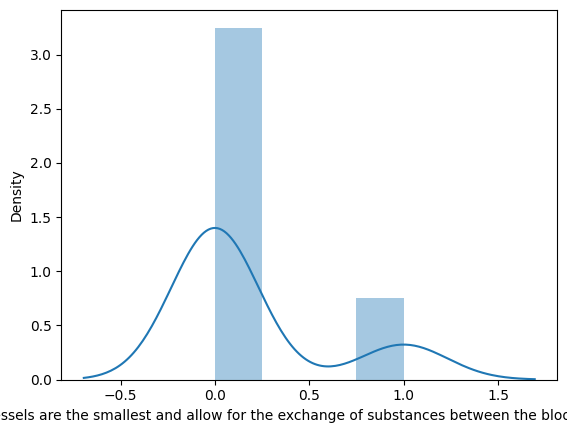

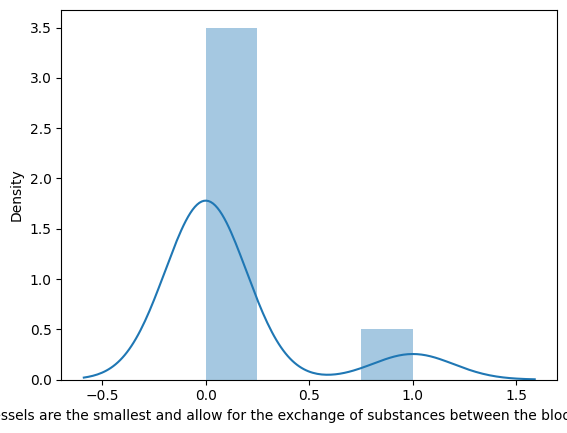

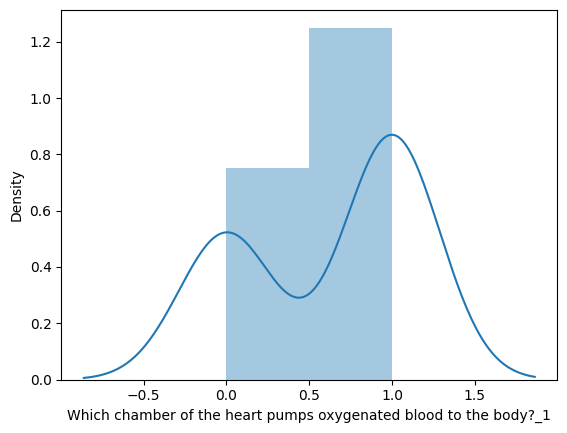

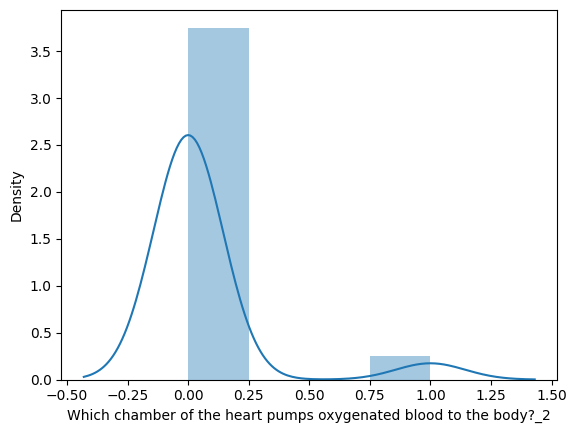

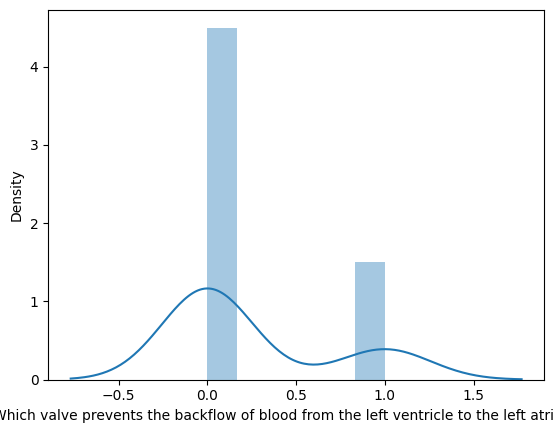

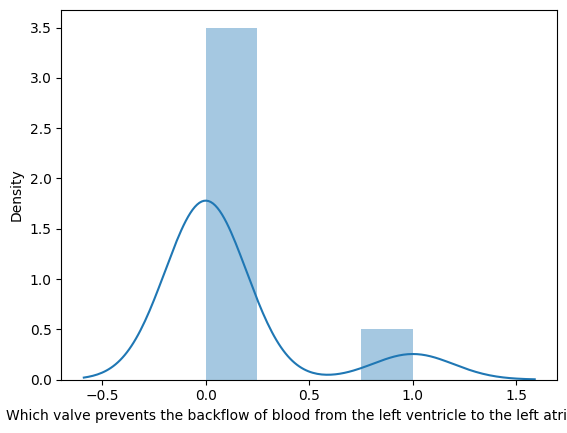

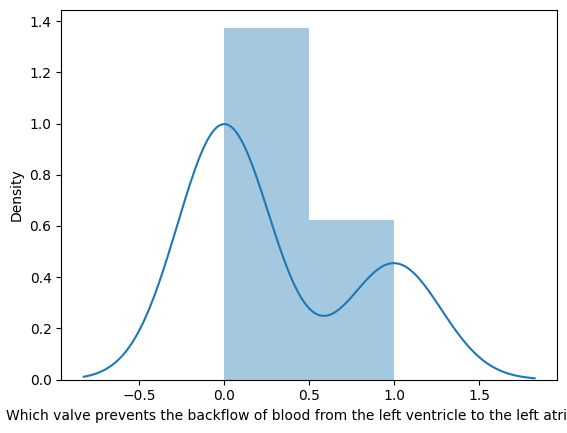

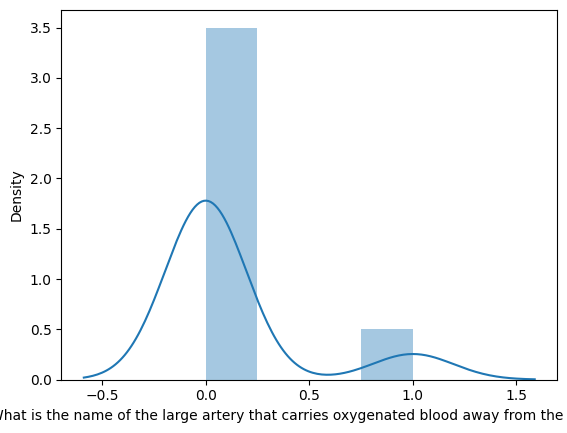

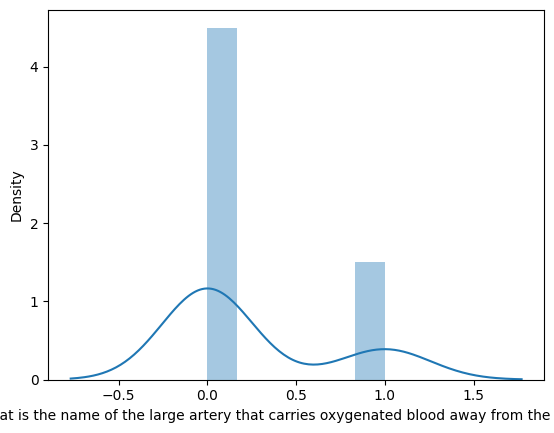

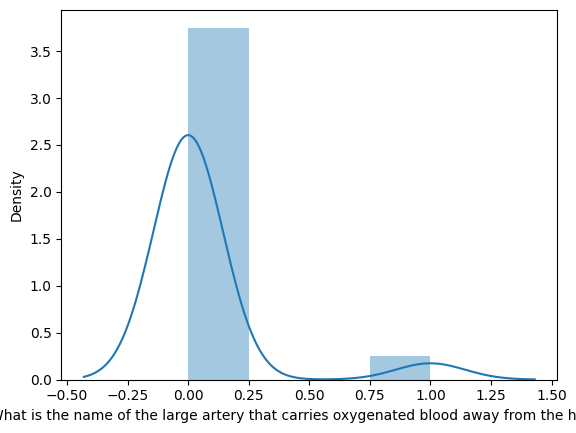

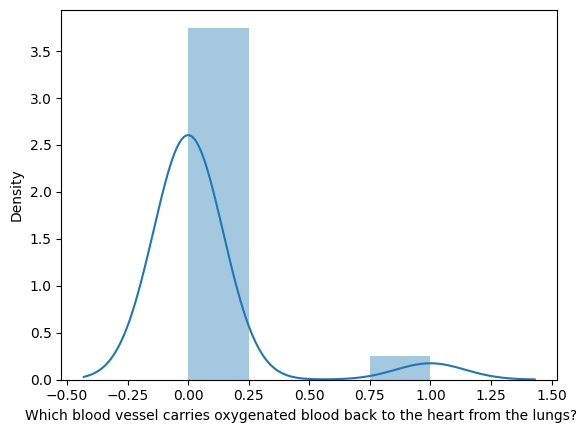

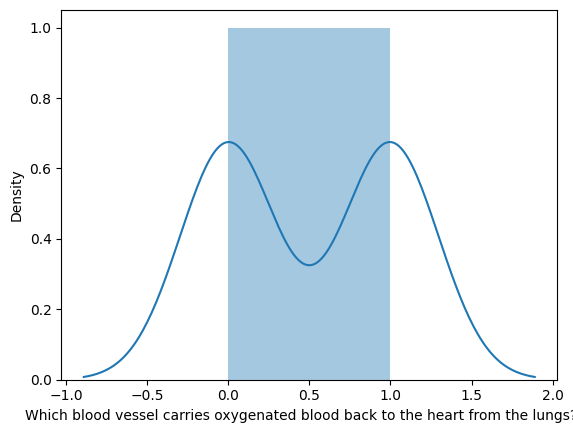

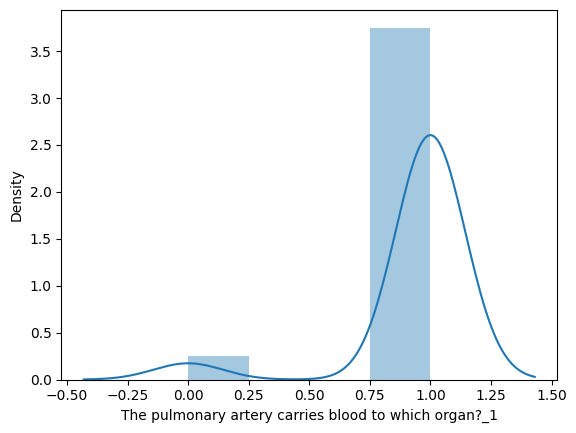

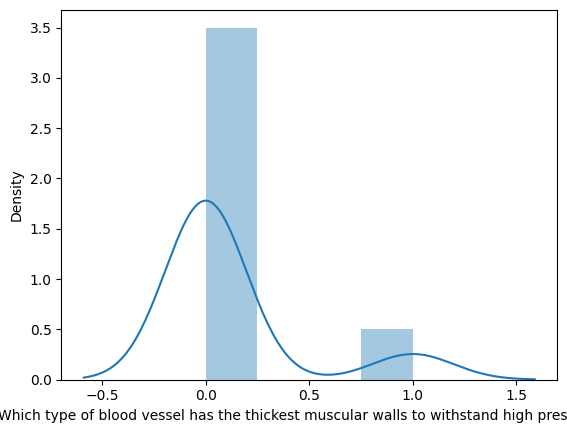

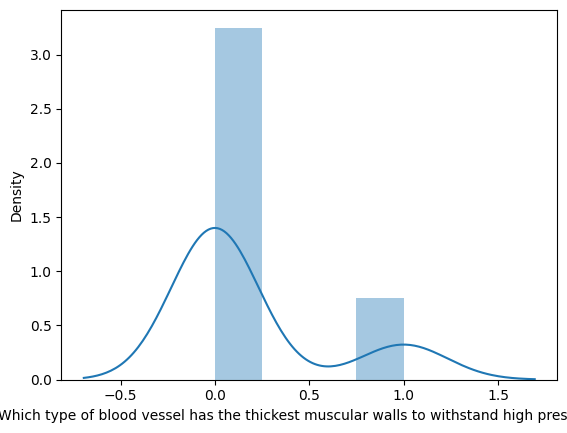

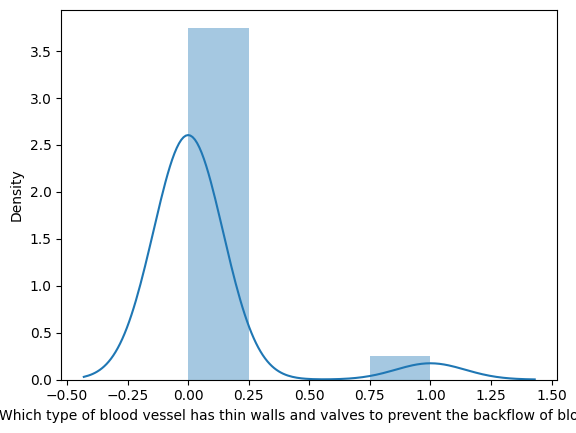

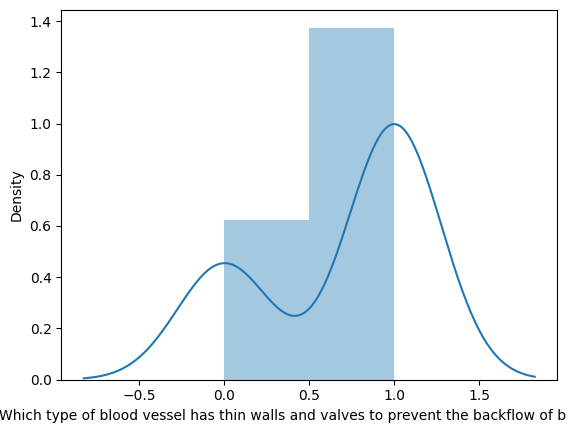

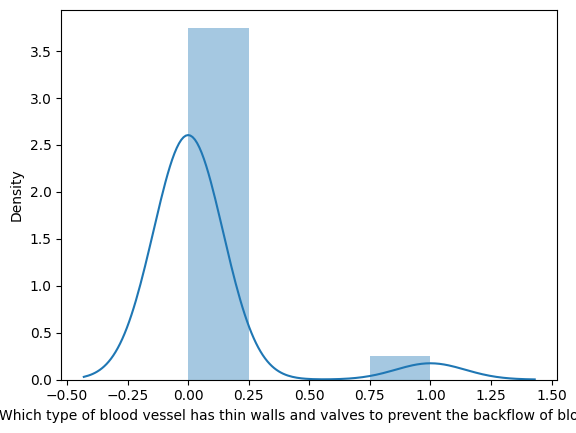

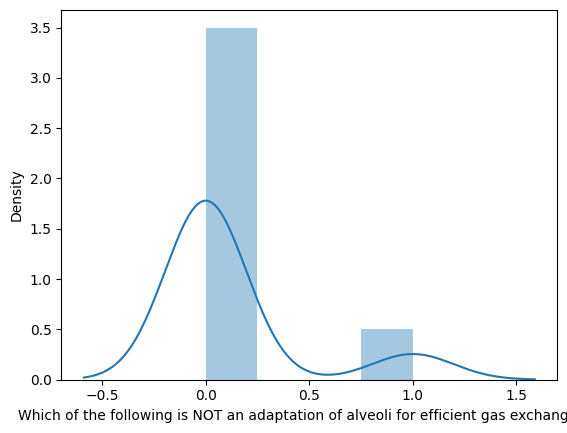

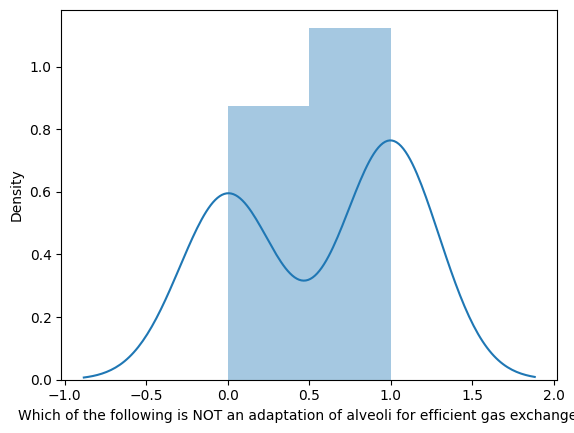

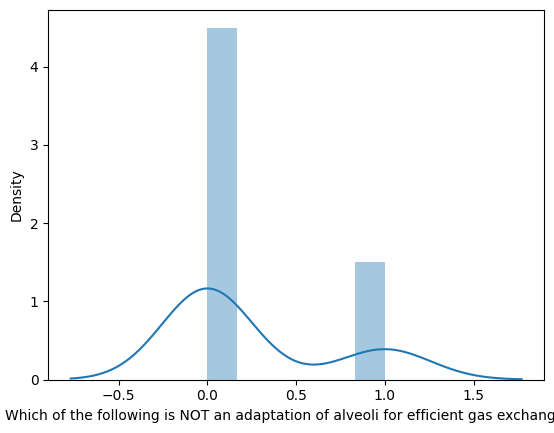

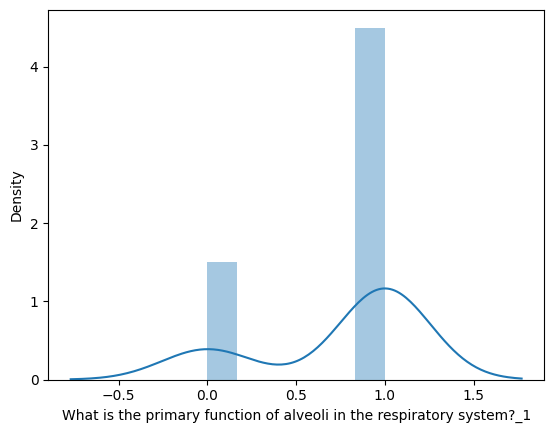

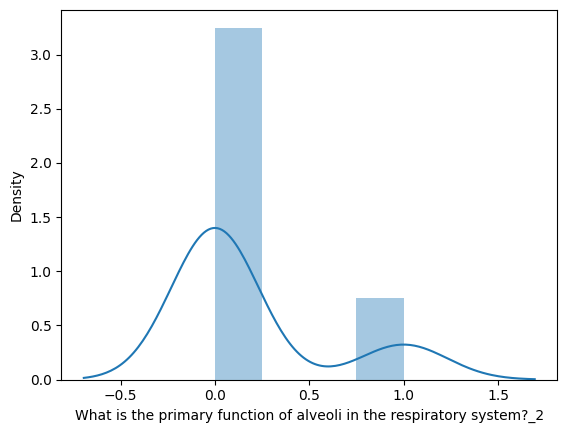

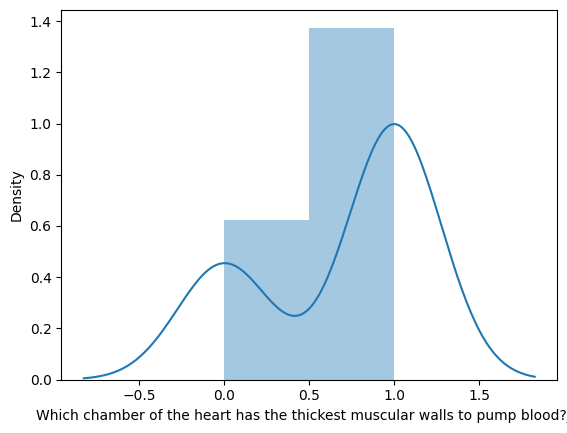

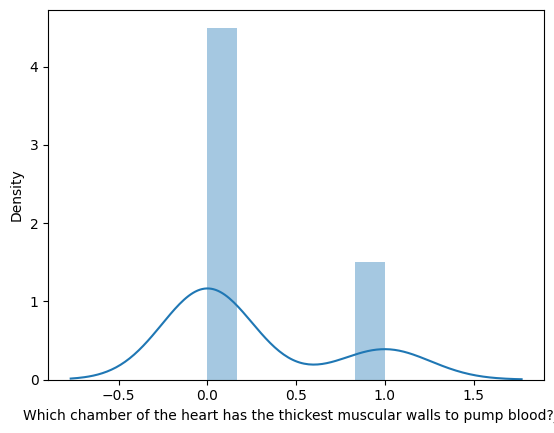

In [66]:
def distplot(x):
    sns.distplot(dataset[x])
    plt.show()

for i in list(dataset.columns)[1:]:
    distplot(i)

<Axes: >

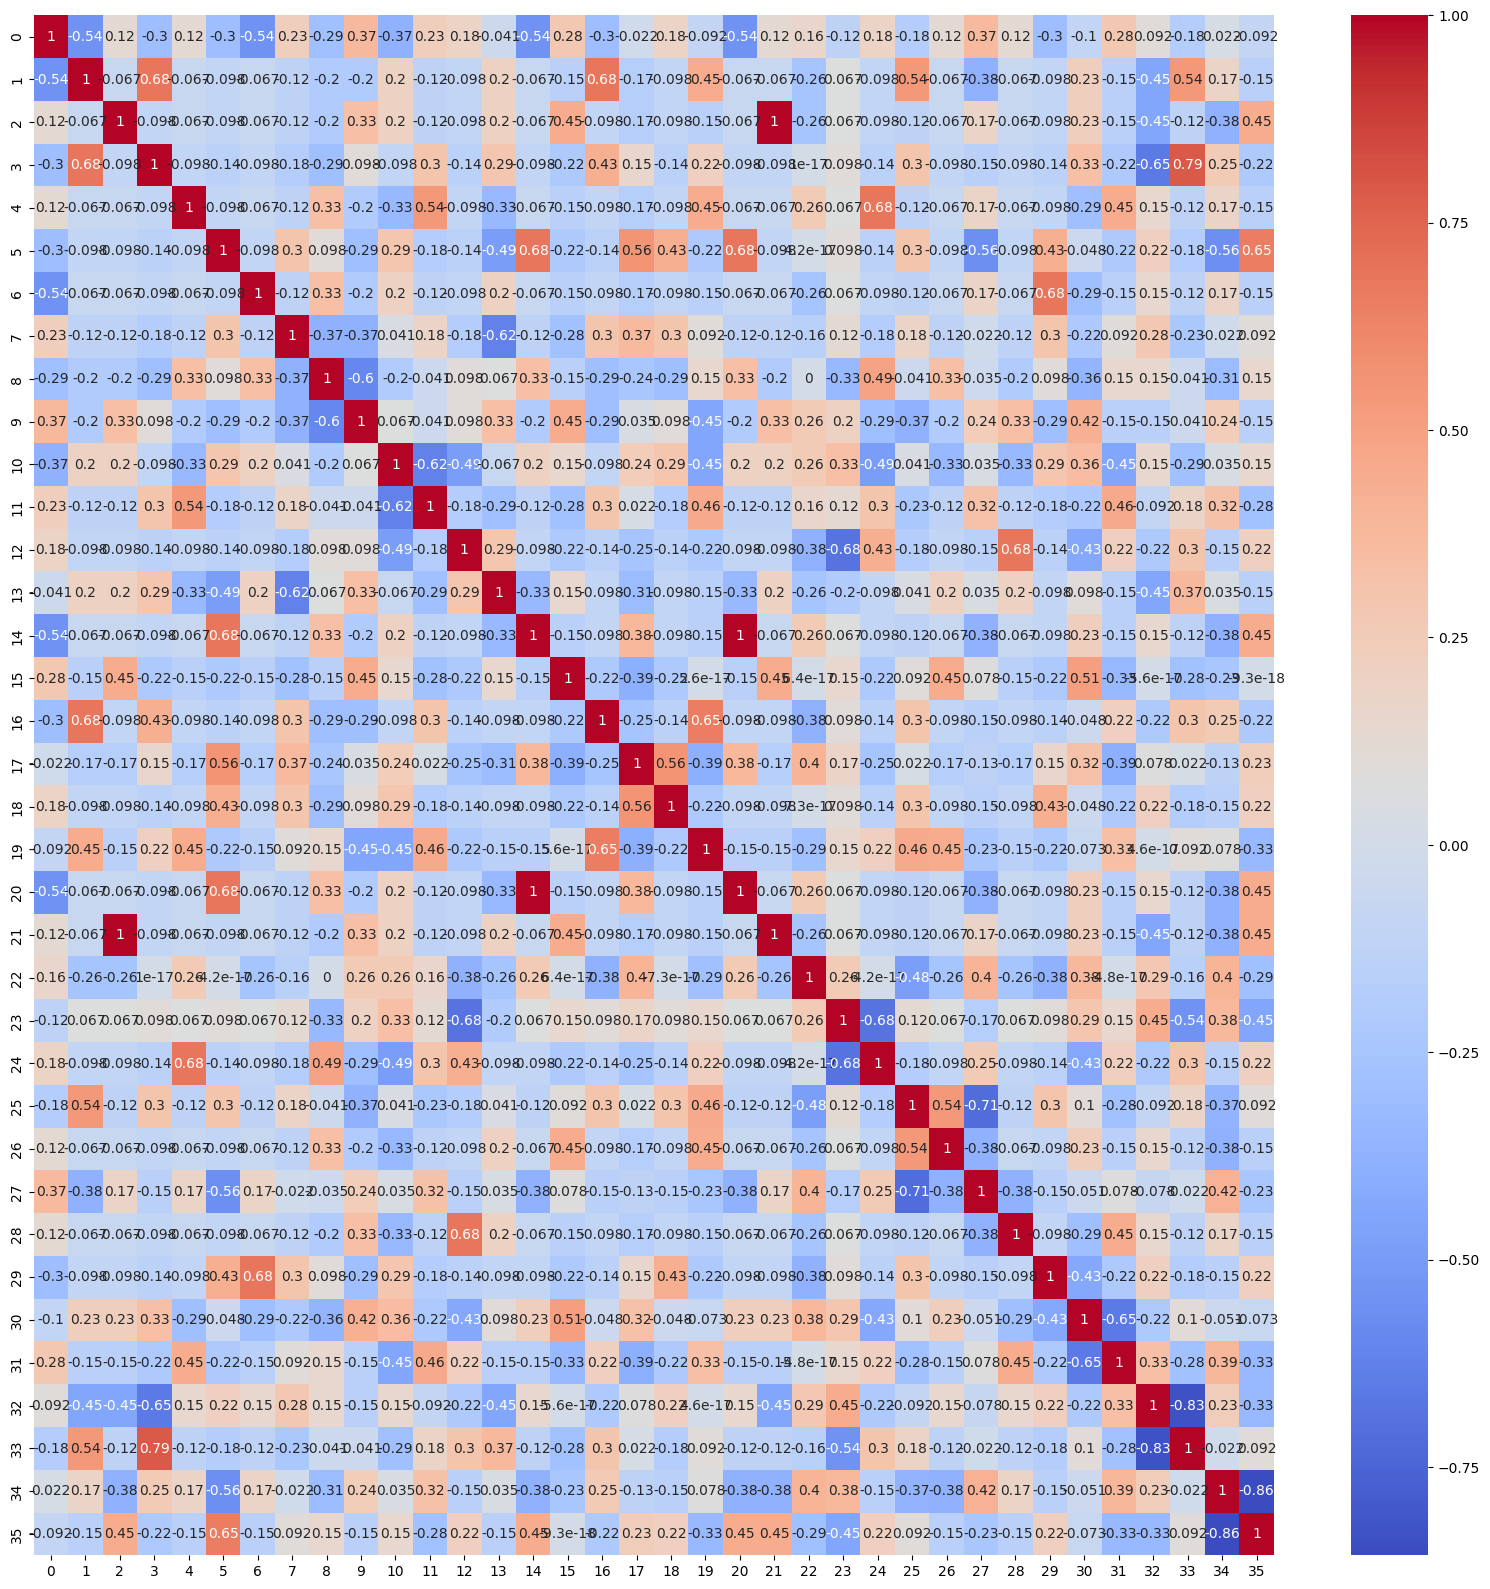

In [79]:
plt.figure(figsize=(20,20))
corr = x.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [64]:
import lux
lux.logger = True

In [61]:
import dtale
import dtale.app as dtale_app

In [62]:
dtale.show(x)

http://03f5492f5a93:40000/dtale/main/2

In [ ]:
#sns.pairplot(x)